In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
path=r"my_movies.csv"

In [3]:
df1=pd.read_csv(path)

In [4]:
df1.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [6]:
df1=pd.get_dummies(df1)

In [7]:
df1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0


In [8]:
df1.dtypes

Sixth Sense         int64
Gladiator           int64
LOTR1               int64
Harry Potter1       int64
Patriot             int64
LOTR2               int64
Harry Potter2       int64
LOTR                int64
Braveheart          int64
Green Mile          int64
V1_Gladiator        uint8
V1_Harry Potter1    uint8
V1_LOTR1            uint8
V1_Sixth Sense      uint8
V2_Harry Potter2    uint8
V2_LOTR             uint8
V2_LOTR1            uint8
V2_LOTR2            uint8
V2_Patriot          uint8
V3_Braveheart       uint8
V3_Gladiator        uint8
V3_Harry Potter1    uint8
V3_Sixth Sense      uint8
V4_Green Mile       uint8
V5_LOTR2            uint8
dtype: object

In [9]:
frequent_patterns=apriori(df1,min_support=0.3,use_colnames=True)

In [10]:
frequent_patterns

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(Patriot, Sixth Sense, V3_Sixth Sense, Gladiat..."
59,0.4,"(Sixth Sense, Gladiator, V3_Sixth Sense, V2_Pa..."
60,0.4,"(Sixth Sense, V3_Sixth Sense, Patriot, V2_Patr..."
61,0.4,"(Patriot, V3_Sixth Sense, Gladiator, V2_Patrio..."


In [13]:
rules=association_rules(frequent_patterns,metric='lift',min_threshold=0.6)

In [14]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(Gladiator),"(Sixth Sense, V3_Sixth Sense, Patriot, V2_Patr...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
598,(Patriot),"(Sixth Sense, Gladiator, V3_Sixth Sense, V2_Pa...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
599,(V3_Sixth Sense),"(Sixth Sense, Gladiator, Patriot, V2_Patriot, ...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
600,(V2_Patriot),"(Patriot, Sixth Sense, V3_Sixth Sense, Gladiat...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [15]:
rules.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
447,(V3_Sixth Sense),"(V2_Patriot, Sixth Sense, Gladiator, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
498,"(Sixth Sense, V1_Gladiator)","(V2_Patriot, V3_Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
496,"(Sixth Sense, Patriot)","(V2_Patriot, V1_Gladiator, V3_Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
493,"(V2_Patriot, V1_Gladiator, V3_Sixth Sense)","(Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
492,"(V1_Gladiator, V3_Sixth Sense, Patriot)","(V2_Patriot, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
491,"(V2_Patriot, V3_Sixth Sense, Patriot)","(Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
490,"(V2_Patriot, Sixth Sense, V1_Gladiator)","(V3_Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
489,"(Sixth Sense, V1_Gladiator, Patriot)","(V2_Patriot, V3_Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
488,"(V2_Patriot, Sixth Sense, Patriot)","(V1_Gladiator, V3_Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
483,"(V2_Patriot, Sixth Sense, V1_Gladiator, Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf


In [16]:
rules.sort_values('confidence',ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
301,(V1_Gladiator),"(V2_Patriot, Gladiator, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
429,"(V2_Patriot, V3_Sixth Sense, Patriot)","(Sixth Sense, Gladiator)",0.4,0.5,0.4,1.0,2.000000,0.20,inf
432,"(V2_Patriot, Sixth Sense, V3_Sixth Sense)","(Gladiator, Patriot)",0.4,0.6,0.4,1.0,1.666667,0.16,inf
433,"(V2_Patriot, Sixth Sense, Gladiator)","(V3_Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.500000,0.24,inf
434,"(V2_Patriot, V3_Sixth Sense, Gladiator)","(Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.500000,0.24,inf
242,"(Sixth Sense, Patriot)","(V2_Patriot, V1_Gladiator)",0.4,0.6,0.4,1.0,1.666667,0.16,inf
241,"(Sixth Sense, V1_Gladiator)","(V2_Patriot, Patriot)",0.4,0.6,0.4,1.0,1.666667,0.16,inf
435,"(Sixth Sense, Patriot)","(V2_Patriot, V3_Sixth Sense, Gladiator)",0.4,0.4,0.4,1.0,2.500000,0.24,inf
436,"(V3_Sixth Sense, Patriot)","(V2_Patriot, Sixth Sense, Gladiator)",0.4,0.4,0.4,1.0,2.500000,0.24,inf
238,"(V2_Patriot, Sixth Sense)","(V1_Gladiator, Patriot)",0.4,0.6,0.4,1.0,1.666667,0.16,inf


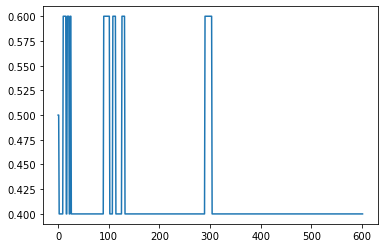

In [18]:
plt.plot(rules.support)

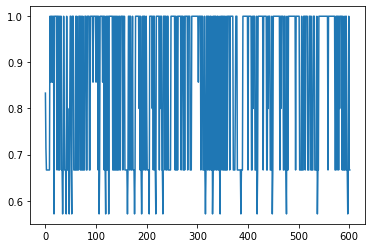

In [19]:
plt.plot(rules.confidence)

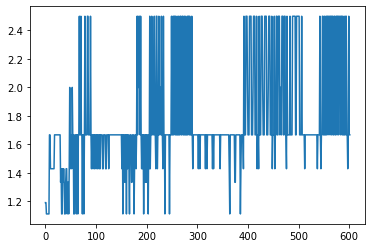

In [20]:
plt.plot(rules.lift)

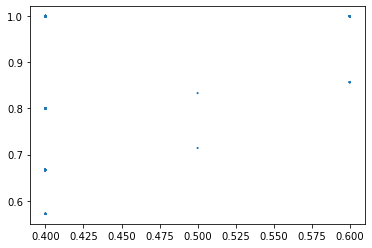

In [21]:
plt.scatter(rules.support,rules.confidence,rules.lift)